<a href="https://colab.research.google.com/github/Tagore-7/Neural_Networks_AK/blob/main/neural_networks_from_scratch_just_numpy_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240704%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240704T040327Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0c22ae69b32024e38a9305b334f09f2bc48eea9e82d90d5b40945cea7bd237376e9d010aaa9f4506467895b525de19fff363cd98ccc4491f40cc6d6fe3b13acd9b2b8645012f6da2048de07625a3dc27b06de246980b351f413faf3b122a7dcfe79d3fa675895ef235b23bee43025207af6720ff79cb0df0d5bad32c91dc8a95ef59fbfd025ef6f54265aabd660c986001cbdfc5df159d4eac6fcbaa534110a55c25e6167866718f7555224089fceef76ef6406766e8ccbe872e3a8d90f56405e7e57457ecbbfab8a7359bf844acb413d08b7240680e538c43a660775dba01792bcde57f346440899ca898e27b9a8895cf50c5f9e3feebf7cf1b2f23fa2b8efc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [ ]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
# print(data)
m, n = data.shape
# print(m ,n )
np.random.shuffle(data)

data_dev = data[:1000].T
# print(data_dev)
Y_dev = data_dev[0]
# print(Y_dev)
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
# print(X_dev)

data_train = data[1000:m].T
# print(data_train)
Y_train = data_train[0]
# print(Y_train)
X_train = data_train[1:n]
X_train = X_train / 255.
# print(X_train)

_, m_train = X_train.shape


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A =  np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0


def backward_prop(Z1, A1, Z2, A2,W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m  * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 0 ... 0 1 8] [5 5 0 ... 6 0 3]
0.155
Iteration:  10
[6 8 0 ... 0 1 0] [5 5 0 ... 6 0 3]
0.20682926829268292
Iteration:  20
[6 8 5 ... 0 1 4] [5 5 0 ... 6 0 3]
0.28704878048780486
Iteration:  30
[6 8 5 ... 0 1 4] [5 5 0 ... 6 0 3]
0.34980487804878047
Iteration:  40
[6 8 5 ... 0 1 4] [5 5 0 ... 6 0 3]
0.4044146341463415
Iteration:  50
[6 8 5 ... 5 1 4] [5 5 0 ... 6 0 3]
0.45090243902439026
Iteration:  60
[6 8 5 ... 5 2 4] [5 5 0 ... 6 0 3]
0.49278048780487804
Iteration:  70
[6 5 0 ... 8 2 8] [5 5 0 ... 6 0 3]
0.529
Iteration:  80
[6 5 0 ... 8 2 8] [5 5 0 ... 6 0 3]
0.5638048780487804
Iteration:  90
[6 5 0 ... 8 2 8] [5 5 0 ... 6 0 3]
0.5971951219512195
Iteration:  100
[8 5 0 ... 6 2 8] [5 5 0 ... 6 0 3]
0.6276829268292683
Iteration:  110
[5 5 0 ... 6 2 8] [5 5 0 ... 6 0 3]
0.6548780487804878
Iteration:  120
[5 5 0 ... 6 2 8] [5 5 0 ... 6 0 3]
0.6787073170731708
Iteration:  130
[5 5 0 ... 6 2 8] [5 5 0 ... 6 0 3]
0.6989268292682926
Iteration:  140
[5 5 0 ... 6 2 8] [5 5

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction  = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28 , 28 )) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [5]
Label:  5


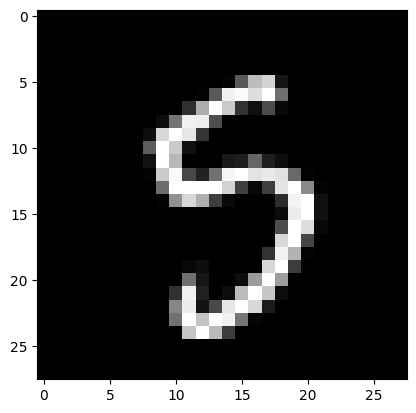

In [ ]:
test_predictions(0, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 9 8 8 5 0 5 9 3 8 7 1 5 6 2 9 8 6 0 5 1 7 1 9 0 9 7 7 8 5 5 1 0 3 9 1 6
 5 4 8 0 4 7 6 7 3 4 9 6 9 6 7 6 4 9 9 1 4 6 8 6 1 6 8 1 0 5 1 4 3 4 7 1 4
 6 7 2 7 7 4 1 5 8 4 3 1 0 7 0 1 3 6 0 7 0 2 9 5 9 5 7 9 1 7 3 3 3 8 7 6 8
 2 5 0 0 3 9 8 9 8 5 1 0 4 4 1 6 3 3 3 0 7 7 3 0 8 5 2 2 9 4 4 1 9 5 8 6 5
 0 8 9 2 1 6 5 9 6 3 4 1 3 7 1 7 4 6 9 3 6 3 7 9 4 3 5 8 3 9 0 5 7 0 3 1 7
 3 7 1 5 3 4 6 9 3 7 7 1 7 7 1 8 3 9 8 2 8 0 4 8 3 4 5 0 7 4 3 5 4 5 7 9 7
 2 6 4 7 0 4 1 8 9 2 2 8 9 0 5 5 7 8 3 9 2 3 1 8 2 3 1 6 5 1 2 3 6 4 2 9 1
 3 7 7 5 7 0 8 5 7 7 7 1 2 6 9 5 1 8 2 0 1 5 2 7 3 6 1 0 5 7 3 8 3 8 8 6 1
 7 0 9 9 1 5 1 7 2 8 2 5 5 0 9 3 4 3 8 1 2 8 4 2 1 1 7 1 0 9 7 0 7 4 7 0 5
 6 3 8 1 1 3 6 2 8 6 6 2 1 8 7 6 2 1 5 7 2 4 1 8 5 5 5 2 4 1 5 9 5 4 5 7 1
 7 1 2 3 4 4 2 7 1 8 5 2 3 5 2 8 5 3 2 1 3 3 3 9 9 0 4 5 3 9 5 5 7 2 1 8 7
 4 1 4 0 9 2 1 5 6 9 1 6 8 3 6 6 3 2 3 3 2 7 9 2 3 4 4 8 5 2 7 3 8 6 7 4 8
 4 0 9 1 3 8 1 7 7 2 1 9 5 0 7 1 3 5 4 9 3 1 9 4 9 1 3 6 5 7 8 5 1 2 5 0 4
 6 5 8 5 5 2 4 6 7 4 4 3 

0.85